## Final Project - Consulting a new Etsy business
### By Lindsay Hayes
***

### Problem
Etsy has made it easy for micro and small business owners to open up an e-commerce shop with little to no overhead. Many shop owners pair their social media accounts with their Etsy shop to draw in traffic. I seek to determine the attributes that they need to focus on growing in order to grow their sales organically.

### Hypothesis
Shops with a high number of "favorers" and reviews while being based in the US will drive the most traffic. Due to Etsy being a US-based shop, their customer base is the biggest within the US. The number of "favorers" and reviews will positively affect the algorithm to put their shops and listings at the top of searches.

### Goals & Success Metrics
I look to clearly show the positive correlation between sales and number of reviews and "favorers".


### Limitations
This dataset is for two months (Nov + Dec) of 2019 for shops that have been open for less than two months. It does not take into consideration outside resources like social media presence to contribute towards the success of a new shop.

##### Data Set: Kaggle

### Getting Started (Prepare)
Importing tools and libraries then reading (read: "downloading") the data file

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#Importing Pandas and several helpful analytics libraries

In [6]:
pwd

'/Users/lindsayhayes/Documents/Python2/final_project'

In [7]:
data = pd.read_csv("etsy_shops_data.csv")
data.head()

#Reading in CSV file - Etsy Shops Dataset

,creation_date,listing_active_count,num_favorers,currency_code,is_shop_us_based,sale_message,sales_count,review_count,shop_location
0,19-Nov,3,1,USD,True,False,0,0,"Kansas City, Missouri"
1,19-Nov,13,1,AUD,False,False,2,0,None
2,19-Nov,0,0,USD,True,False,-99,-99,None
3,19-Nov,40,1,USD,False,False,0,0,"Kharkiv, Ukraine"
4,19-Nov,7,1,USD,True,False,0,0,"New York, United States"


### Prepare: Continued

In [8]:
# this dataset has 20k stores (rows) with 9 attributes (columns)
data.shape

(20000, 9)

In [9]:
data.dtypes

creation_date           object
listing_active_count     int64
num_favorers             int64
currency_code           object
is_shop_us_based          bool
sale_message              bool
sales_count              int64
review_count             int64
shop_location           object
dtype: object

In [10]:
#renaming columns
data.rename(columns={"creation_date":"YrMonCreated","listing_active_count":"NumActiveListing",
                    "num_favorers":"NumFavorers","currency_code":"CurrencyCode",
                    "is_shop_us_based":"USBasedShop","sale_message": "SaleMessage",
                    "sales_count":"NumSales","review_count":"NumReview",
                    "shop_location":"ShopLocation"}, inplace=True)

In [11]:
#confirming column name change
data.head(2)

,YrMonCreated,NumActiveListing,NumFavorers,CurrencyCode,USBasedShop,SaleMessage,NumSales,NumReview,ShopLocation
0,19-Nov,3,1,USD,True,False,0,0,"Kansas City, Missouri"
1,19-Nov,13,1,AUD,False,False,2,0,None


In [12]:
# data returned with 0 NaN due to value being set to -99
data.isnull().sum()

YrMonCreated        0
NumActiveListing    0
NumFavorers         0
CurrencyCode        0
USBasedShop         0
SaleMessage         0
NumSales            0
NumReview           0
ShopLocation        0
dtype: int64

In [13]:
# converting -99 to 0
data.loc[data["NumSales"]<0,"NumSales"]=0
data.loc[data["NumReview"]<0,"NumReview"]=0
data.loc[data["NumActiveListing"]<0,"NumActiveListing"]=0
data.loc[data["NumFavorers"]<0,"NumFavorers"]=0

In [14]:
# confirming all -99 are converted to 0
data.loc[data["NumSales"]<0,"NumSales"]

Series([], Name: NumSales, dtype: int64)

In [15]:
data.loc[data["NumReview"]<0,"NumReview"]

Series([], Name: NumReview, dtype: int64)

In [16]:
data.loc[data["NumActiveListing"]<0,"NumActiveListing"]

Series([], Name: NumActiveListing, dtype: int64)

In [17]:
data.loc[data["NumFavorers"]<0,"NumFavorers"]

Series([], Name: NumFavorers, dtype: int64)

## Analyze

### Types of Currency

In [18]:
data['CurrencyCode'].value_counts()

USD    13612
EUR     2587
GBP     2430
CAD      699
AUD      485
HKD       33
NZD       33
SGD       29
SEK       28
CHF       28
DKK       23
NOK       10
JPY        2
THB        1
Name: CurrencyCode, dtype: int64

### Overview of the data

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NumActiveListing,20000.0,7.33595,24.582274,0.0,1.0,2.0,7.0,1749.0
NumFavorers,20000.0,0.99680,4.104148,0.0,0.0,0.0,1.0,223.0
NumSales,20000.0,2.04420,26.812784,0.0,0.0,0.0,0.0,2216.0
NumReview,20000.0,0.08640,0.782730,0.0,0.0,0.0,0.0,58.0


It is surprising to see that there are shops with over 2k sales in about a month of opening. 

## Correlation Matrix and Chat

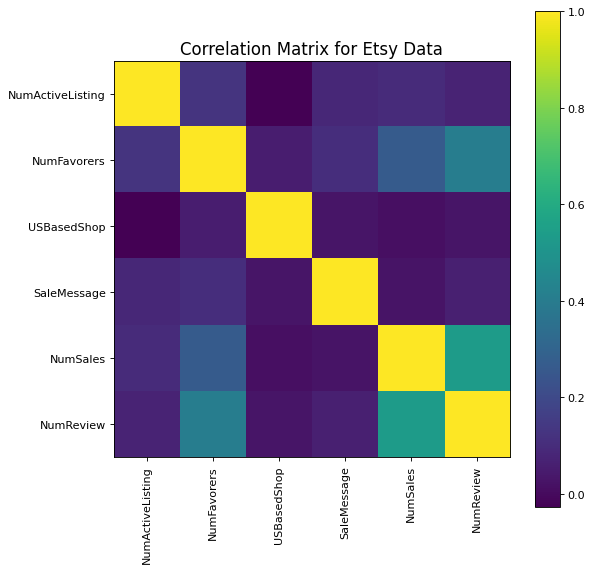

In [20]:
corr = data.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for Etsy Data', fontsize=15)
plt.show()

Using the correlation matrix, we can determine that the number of favorers greatly impacts the number of of reviews and in turn has the great impact on number of sales. The number of favorers, however, doesn't have a direct impact on the number of sales.

In [21]:
# another way of looking at the correlation between the top attributes
data[['NumActiveListing', 'NumFavorers', 'NumSales', 'NumReview']].corr()

,NumActiveListing,NumFavorers,NumSales,NumReview
NumActiveListing,1.000000,0.128962,0.098938,0.073412
NumFavorers,0.128962,1.000000,0.266381,0.408286
NumSales,0.098938,0.266381,1.000000,0.536156
NumReview,0.073412,0.408286,0.536156,1.000000


## Sales by Currency Code

<Figure size 720x432 with 0 Axes>

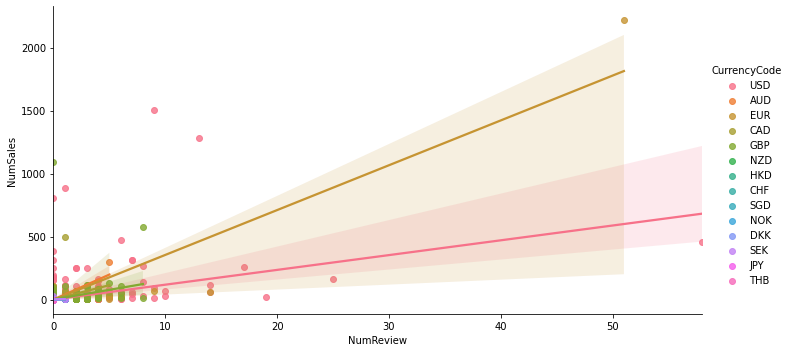

In [22]:
plt.figure(figsize=(10,6))
sns.lmplot('NumReview', 'NumSales', 
           hue='CurrencyCode', data=data, height=5, aspect=2)

We can see that the most frequent sales and reviews come from the listing made under the USD currency code. The outliers here under USD and EUR are likely shops with a high social media presence and launched their shops after.

## Sale Message Impact

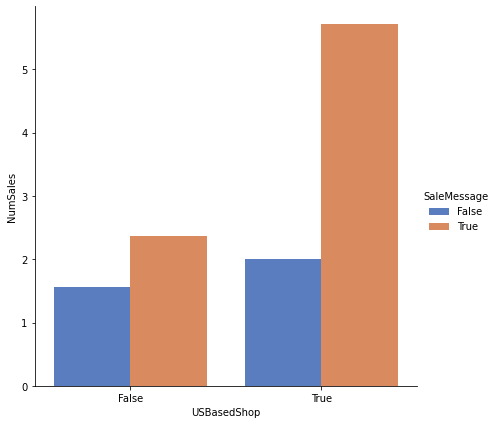

In [23]:
g = sns.catplot(x="USBasedShop", y="NumSales", hue="SaleMessage", data=data,
                height=6, kind="bar", palette="muted",ci=None)

Having a sale message (message sent to buyer after the sale is made), shows to impact the number of sales. This is likely due to referrals by customers or returning customers.

## Conclusion and Recommendations

### - Listings should be published under USD
### - Incentivize your customer to leave a review
### - Always send a "sale message" to your buyer after a purchase
